 #  <p style="text-align: center;">Grouping Similar Problems</p> 

In this example, we are going to group customer support problems into problem groups based on their attributes. Then we will analyze the groups to see similarities and differences.

## Loading the Dataset

In [8]:
%matplotlib inline

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics
import seaborn as sns

raw_data = pd.read_csv("issues.csv")
raw_data.dtypes

PROBLEM_TYPE             object
COUNT                     int64
AVG_CALLS_TO_RESOLVE    float64
AVG_RESOLUTION_TIME       int64
REOCCUR_RATE            float64
REPLACEMENT_RATE        float64
dtype: object

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [2]:
raw_data.head()

,PROBLEM_TYPE,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
0,Admin Password Lost,45,2.3,54,0.15,0.00
1,Windows Reboots automatically,47,3.1,132,0.30,0.03
2,System not coming up after reboot,12,4.0,154,0.02,0.05
3,Slow system,165,1.2,32,0.03,0.00
4,Internet Connectivity loss,321,1.0,5,0.21,0.00


## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

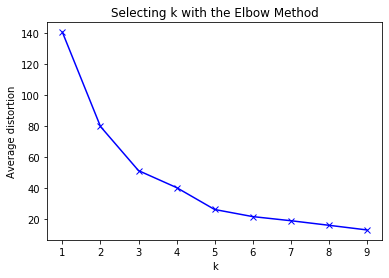

In [3]:
clust_data = raw_data.drop("PROBLEM_TYPE",axis=1)

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clust_data)
    prediction=model.predict(clust_data)
    meanDistortions.append(sum(np.min(cdist(clust_data, model.cluster_centers_, 'euclidean'), axis=1)) / clust_data.shape[0])

#plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Looking at the plot, we see that the knee happens at cluster=3. That is the ideal number of clusters. We now perform the actual clustering for 3. Then we add the cluster ID to the original dataset.

In [13]:
#Optimal clusters is 3
final_model=KMeans(3)
final_model.fit(clust_data)
prediction=final_model.predict(clust_data)

#Join predicted clusters back to raw data
raw_data["GROUP"] = prediction
print("Groups Assigned : \n")
raw_data[["GROUP","PROBLEM_TYPE"]]

Groups Assigned : 



,GROUP,PROBLEM_TYPE
0,0,Admin Password Lost
1,0,Windows Reboots automatically
2,0,System not coming up after reboot
3,2,Slow system
4,1,Internet Connectivity loss
5,0,New Installation hangs
6,0,Intermittent Blank Screen
7,2,Too many popups in Browser
8,2,Cannot find printer
9,0,Missing peripheral driver


## Analyze the groups

We now do a set of boxplots to see how the groups differ for various feature attributes.

We start off with Count.

In [14]:
raw_data.columns

Index(['PROBLEM_TYPE', 'COUNT', 'AVG_CALLS_TO_RESOLVE', 'AVG_RESOLUTION_TIME',
       'REOCCUR_RATE', 'REPLACEMENT_RATE', 'GROUP'],
      dtype='object')

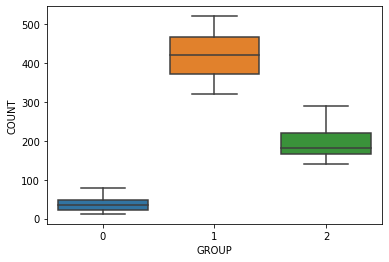

In [15]:
plt.cla()
sns.boxplot(x='GROUP',y='COUNT',data=raw_data)

We can see that the count of incidents range differently for different groups.

Next we see avg. calls to resolve.

In [18]:
raw_data.columns

Index(['PROBLEM_TYPE', 'COUNT', 'AVG_CALLS_TO_RESOLVE', 'AVG_RESOLUTION_TIME',
       'REOCCUR_RATE', 'REPLACEMENT_RATE', 'GROUP'],
      dtype='object')

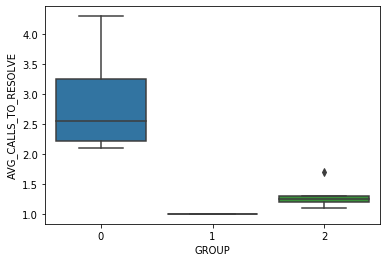

In [19]:
#Now for Avg. Calls to resolve
plt.cla()
sns.boxplot(x='GROUP',y='AVG_CALLS_TO_RESOLVE',data=raw_data)
 

Group 2 has hardly any time needed to resolve. This points to problems that are simple and straight forward. The business need to look at these incidents and provide a self-service path (product help, online help) for the customer instead of wasting agent's time

Next we see Reoccurance Rate.

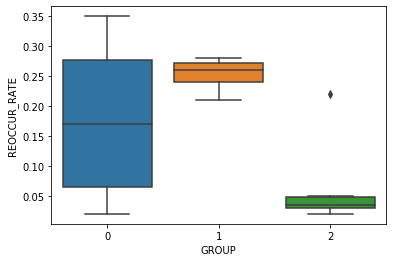

In [20]:
plt.cla()
sns.boxplot(x="GROUP",y="REOCCUR_RATE",data=raw_data)

Group 2 has really high reoccurance rate. This set of incidents need to be analyze to see how the product quality can be improved to prevent these from happening.

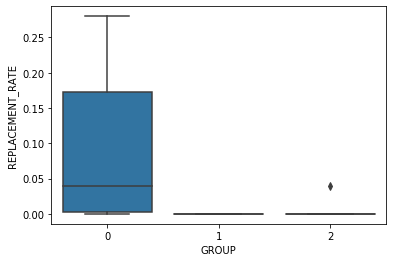

In [21]:
plt.cla()
sns.boxplot(x="GROUP",y="REPLACEMENT_RATE",data=raw_data)

Replacement rates vary widely for Group 1. It does not provide any significant pattern to act upon.